In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

In [32]:
df= pd.read_csv("creditcard.csv")

In [33]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
df.shape

(284807, 31)

In [35]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [37]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [38]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [39]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [40]:
len(df.select_dtypes(include='object').columns)

0

<Axes: ylabel='count'>

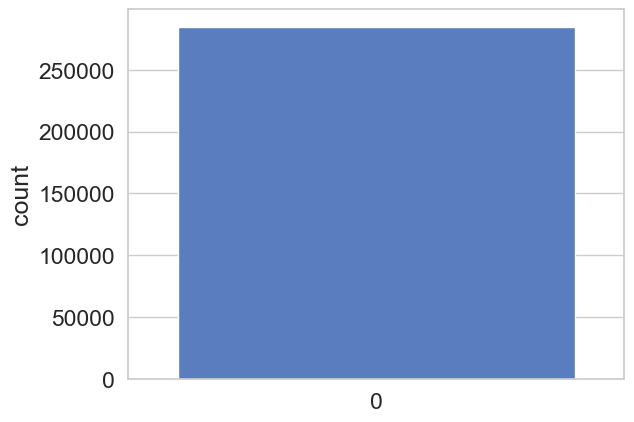

In [41]:
sns.countplot(df['Class'])

In [57]:
fraud = df[df.Class == 1]
legitimate = df[df.Class == 0]

In [58]:
(df.Class == 0).sum()

284315

In [59]:
(df.Class == 1).sum()

492

In [60]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
labels = ["legitimate", "fraud"]

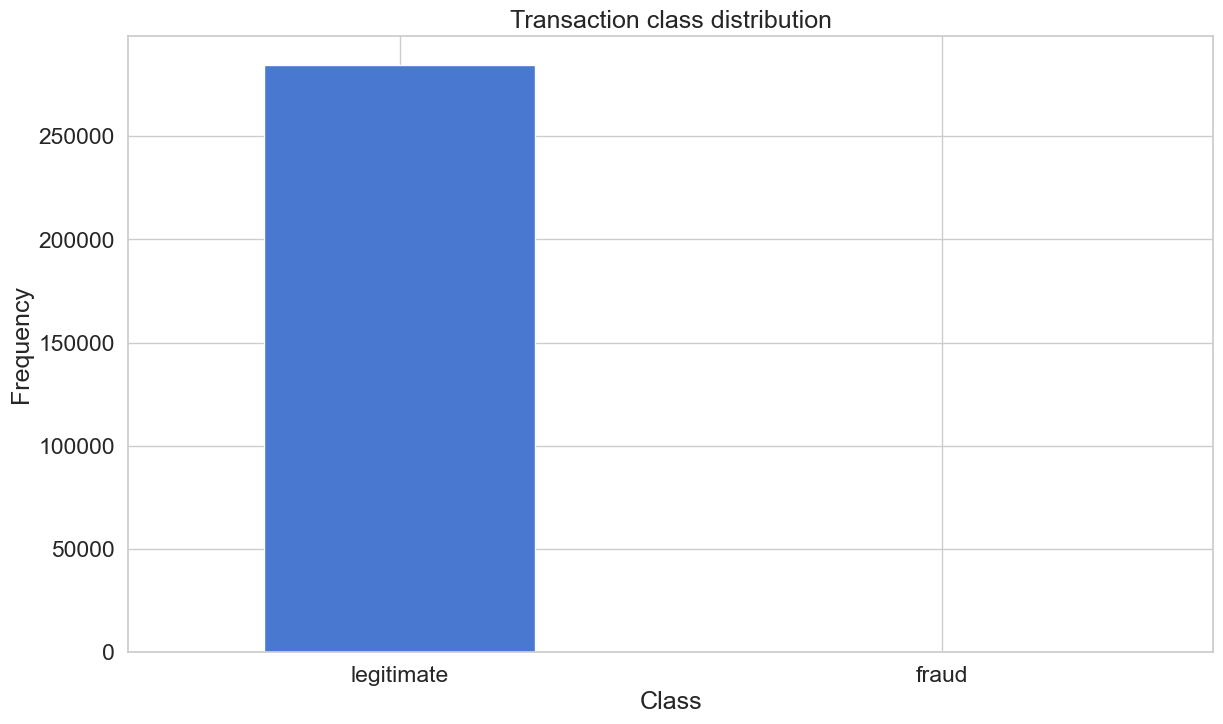

In [61]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2),labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [62]:
dataframe = df.drop(columns='Class')

<Axes: title={'center': 'Correlated with Class'}>

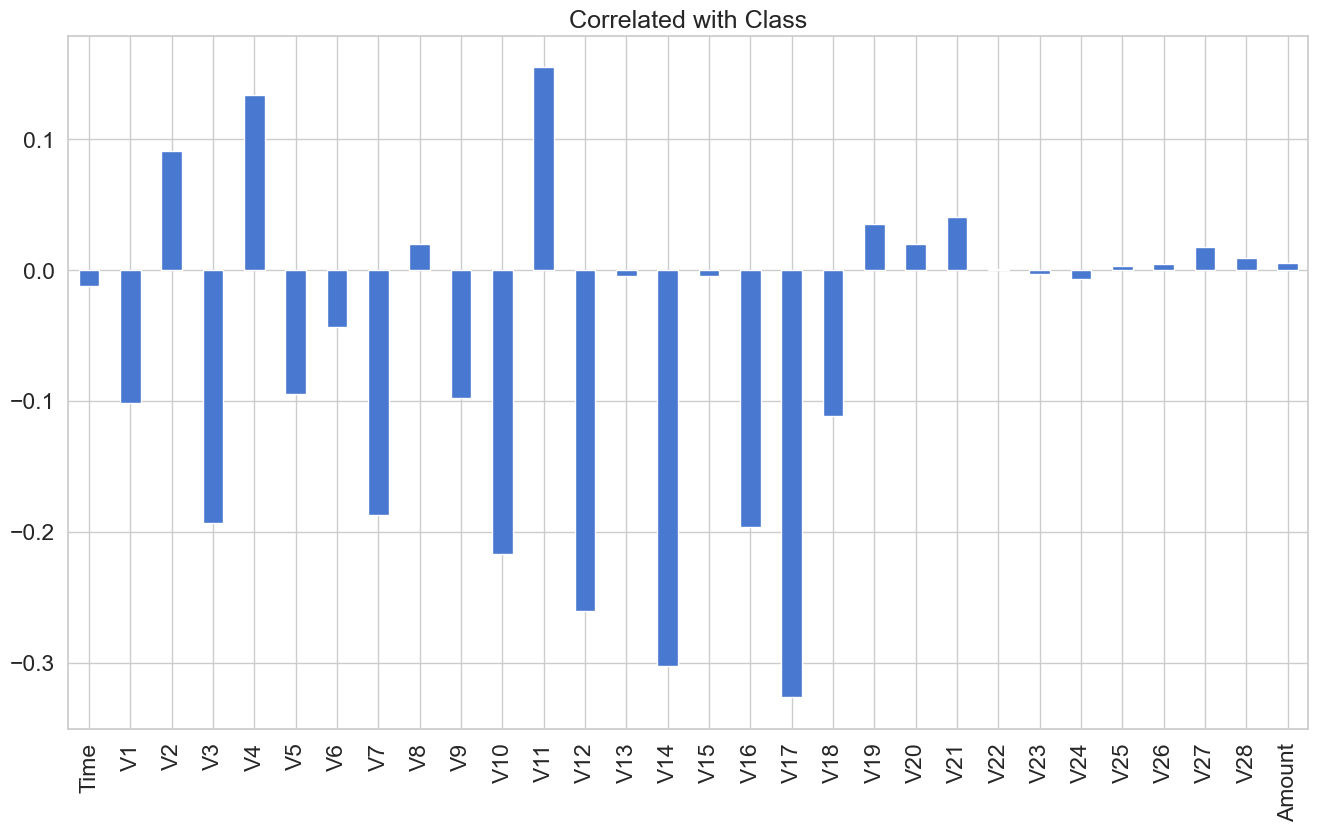

In [63]:
dataframe.corrwith(df['Class']).plot.bar(
  figsize = (16, 9), title = 'Correlated with Class', grid = True
)

In [64]:
corr = df.corr()

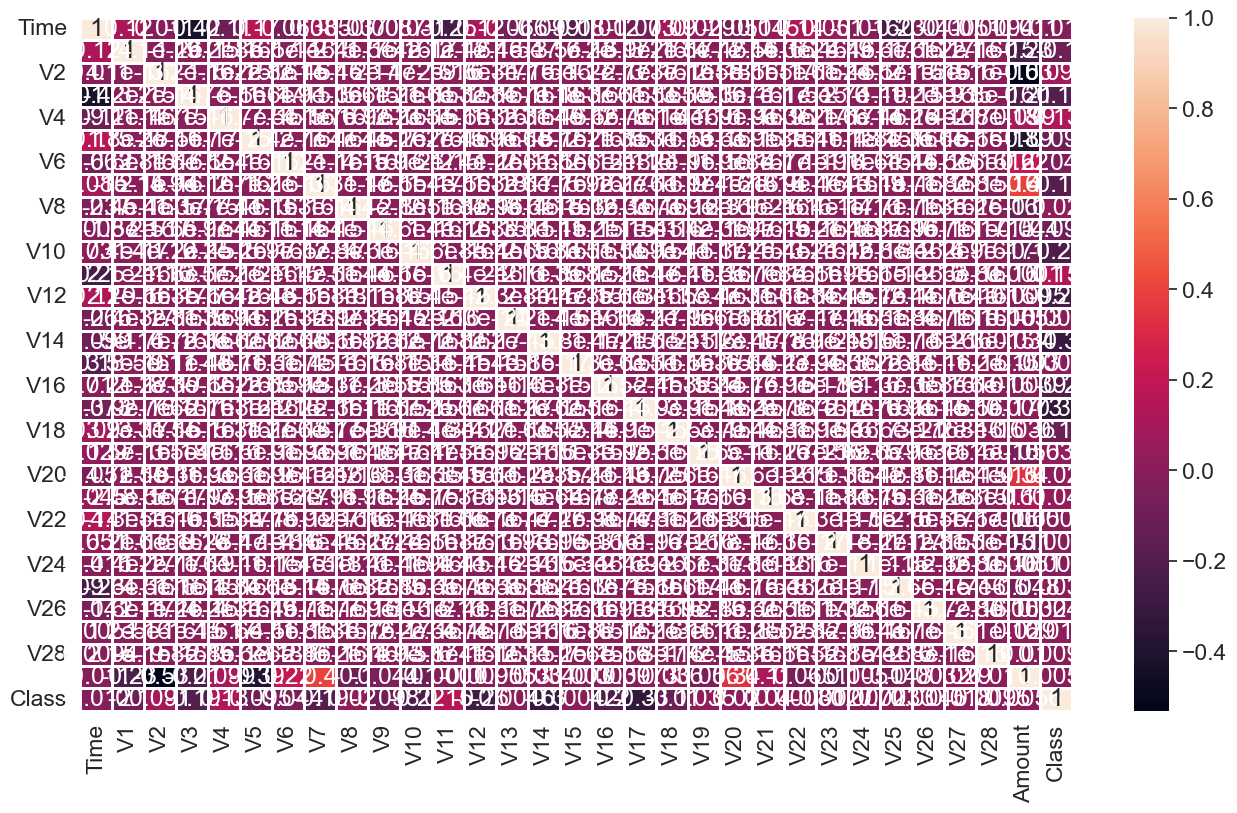

In [65]:
plt.figure(figsize=(16,9)) 
ax = sns.heatmap(corr, annot=True, linewidths=2)

In [68]:
fraud.Amount.info()

<class 'pandas.core.series.Series'>
Index: 492 entries, 541 to 281674
Series name: Amount
Non-Null Count  Dtype  
--------------  -----  
492 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [69]:
legitimate.Amount.info()

<class 'pandas.core.series.Series'>
Index: 284315 entries, 0 to 284806
Series name: Amount
Non-Null Count   Dtype  
--------------   -----  
284315 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


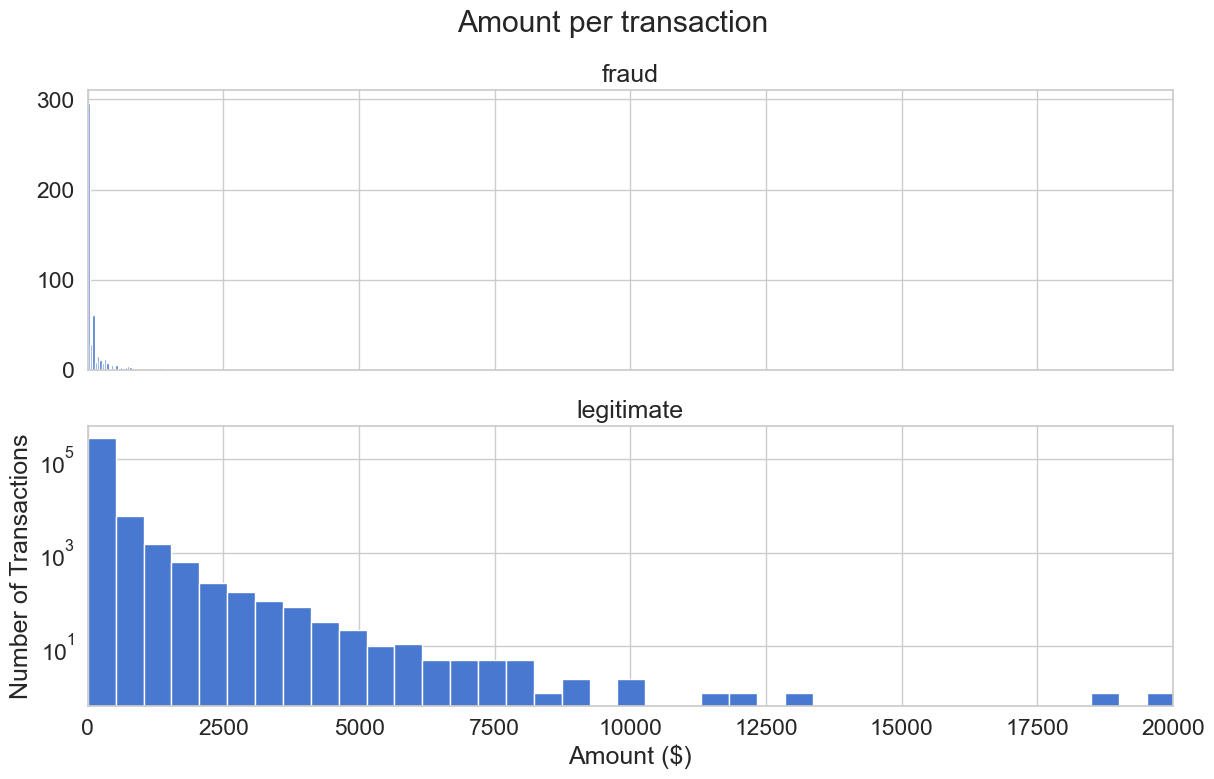

In [72]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction')

bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('fraud')

ax2.hist(legitimate.Amount, bins = bins)
ax2.set_title('legitimate')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

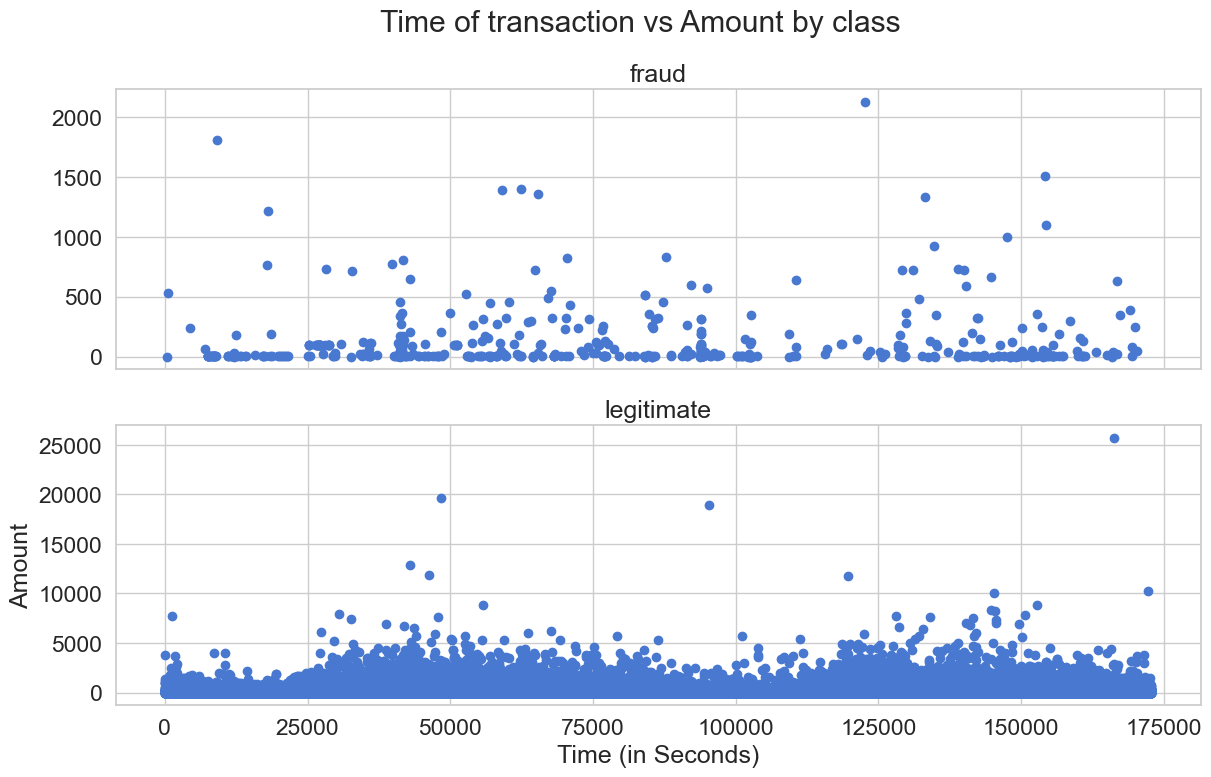

In [75]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('fraud')

ax2.scatter(legitimate.Time, legitimate.Amount)
ax2.set_title('legitimate')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [56]:

# matrix of features / independent variables
x = df.drop(columns = 'Class')

In [18]:
y = df['Class']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2, random_state = 0)
     

In [21]:
x_train.shape


(227845, 30)

In [22]:
y_train.shape

(227845,)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[-0.87750986 -0.57177938  0.62828369 ...  0.57377804 -0.2196612
  -0.30511629]
 [-1.15308534  0.62679248 -0.08362249 ... -0.17091545  0.00631402
  -0.25423683]
 [ 1.26383162  0.98361214 -0.1198731  ...  0.13283995 -0.10128286
  -0.32950779]
 ...
 [-0.38349503  0.77210803 -0.57499928 ... -0.00209668  0.01184758
  -0.21662151]
 [ 0.05096267  0.91851362 -1.02985151 ... -0.08231776 -0.10081197
   0.33333622]
 [-0.41989457 -0.30294167  0.45385207 ...  0.21715744  0.36857129
  -0.29286006]]
[[ 0.65238668 -0.16686457  0.64154241 ...  0.27172397  0.50280513
  -0.19606009]
 [ 1.31372573 -0.18035885  0.56586861 ...  0.19283776  0.54777109
  -0.34934352]
 [ 1.21343225 -0.82732765 -1.45828848 ...  0.7146577   1.36386022
   0.02971246]
 ...
 [ 0.89086789  0.57407801 -1.38701874 ... -0.5986488  -0.02294377
   1.99397392]
 [ 1.39073528  1.05455377  0.17341371 ... -0.2555804  -0.19207626
  -0.34543281]
 [ 1.22637946  1.20109412 -0.80279701 ...  0.01953937 -0.16055905
  -0.2968514 ]]
68806     0
40018

In [28]:
input_dim = x_train.shape[1]
encoding_dim = 14

In [76]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Define the input layer
input_layer = Input(shape=(input_dim, ))

# Encoder layers
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

# Decoder layers
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)


In [78]:
nb_epoch = 20
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(x_train, x_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.8250 - accuracy: 0.3773 - val_loss: 0.7973 - val_accuracy: 0.4624
Epoch 2/20
  74/7121 [..............................] - ETA: 10s - loss: 0.6979 - accuracy: 0.4628

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7121/7121 [==============================] - 13s 2ms/step - loss: 0.7582 - accuracy: 0.4725 - val_loss: 0.7734 - val_accuracy: 0.4783
Epoch 3/20
7121/7121 [==============================] - 13s 2ms/step - loss: 0.7437 - accuracy: 0.4844 - val_loss: 0.7645 - val_accuracy: 0.4855
Epoch 4/20
7121/7121 [==============================] - 11s 2ms/step - loss: 0.7365 - accuracy: 0.4918 - val_loss: 0.7583 - val_accuracy: 0.4981
Epoch 5/20
7121/7121 [==============================] - 11s 2ms/step - loss: 0.7317 - accuracy: 0.5014 - val_loss: 0.7538 - val_accuracy: 0.5035
Epoch 6/20
7121/7121 [==============================] - 11s 2ms/step - loss: 0.7285 - accuracy: 0.5123 - val_loss: 0.7507 - val_accuracy: 0.5092
Epoch 7/20
7121/7121 [==============================] - 11s 2ms/step - loss: 0.7258 - accuracy: 0.5168 - val_loss: 0.7487 - val_accuracy: 0.5166
Epoch 8/20
7121/7121 [==============================] - 11s 2ms/step - loss: 0.7240 - accuracy: 0.5209 - val_loss: 0.7470 - val_accuracy: 0.5

In [79]:
autoencoder = load_model('model.h5')

In [80]:
predictions = autoencoder.predict(x_test)

1781/1781 [==============================] - 2s 840us/step


In [81]:
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,'true_class': y_test})
error_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56962 entries, 183484 to 246221
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reconstruction_error  56962 non-null  float64
 1   true_class            56962 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.3 MB


In [82]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,roc_curve, recall_score, classification_report, f1_score,precision_recall_fscore_support)

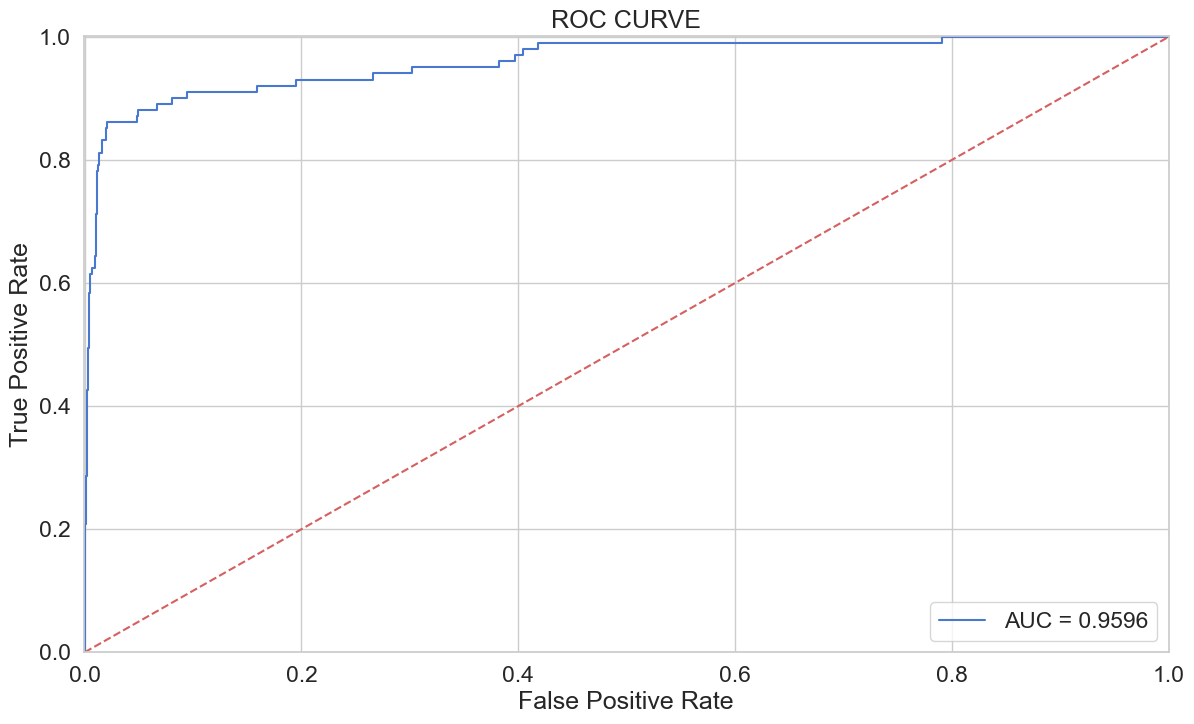

In [84]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('ROC CURVE')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [85]:
from tensorflow.keras.models import model_from_json

model_json = autoencoder.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

autoencoder.save_weights("model_weights.h5")


In [86]:
#####
'''from tensorflow.keras.models import model_from_json

# Load the model architecture from the JSON file
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load the model weights from the HDF5 file
loaded_model.load_weights("model_weights.h5")

# Use the loaded model for inference
result = loaded_model.predict(your_input_data)'''

'from tensorflow.keras.models import model_from_json\n\n# Load the model architecture from the JSON file\njson_file = open("model.json", "r")\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n\n# Load the model weights from the HDF5 file\nloaded_model.load_weights("model_weights.h5")\n\n# Use the loaded model for inference\nresult = loaded_model.predict(your_input_data)'